Imports

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"



Prepare DATASET

In [2]:

train = ImageDataGenerator(rescale=1/255,validation_split=0.2)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/all/train",
                                          target_size=(32,32),
                                          batch_size = 96,
                                          class_mode = 'binary',subset='training')

validation_dataset = train.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/all/train",
                                          target_size=(32,32),
                                          batch_size = 96,
                                          class_mode = 'binary',subset='validation')                                    
test_dataset = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/all/test",
                                          target_size=(32,32),
                                          batch_size =96,
                                          class_mode = 'binary')

test_dataset.class_indices

Found 2560 images belonging to 2 classes.
Found 640 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


{'SNGAN_all_test': 0, 'imagewoof_test': 1}

Design Model

In [3]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
# model.add(keras.layers.MaxPool2D(2,2))

# model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))

# model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Conv2D(4,(3,3),activation='relu'))
# model.add(keras.layers.MaxPool2D(2,2))
# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(32,activation='relu'))

# Output layer with single neuron which gives 0 for fake or 1 for real 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-03 21:31:56.300433: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-03 21:31:56.300541: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Training

Usually with every epoch increasing, loss goes lower and accuracy goes higher. But with val_loss and val_acc, many cases can be possible:

val_loss starts increasing, val_acc starts decreasing(means model is cramming values not learning)

val_loss starts increasing, val_acc also increases.(could be case of overfitting or diverse probability values in cases softmax is used in output layer)

val_loss starts decreasing, val_acc starts increasing(Correct, means model build is learning and working fine)

In [4]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(train_dataset,
        #  steps_per_epoch = 80,
         epochs = 100,
         callbacks=[early_stopping],
         validation_data = validation_dataset
         )

Epoch 1/100


2022-07-03 21:31:56.473945: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/27 [>.............................] - ETA: 11s - loss: 0.6628 - accuracy: 0.7500

2022-07-03 21:31:56.736083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 1s 31ms/step - loss: 0.7041 - accuracy: 0.7180 - val_loss: 0.5382 - val_accuracy: 0.7563
Epoch 2/100
 1/27 [>.............................] - ETA: 0s - loss: 0.5500 - accuracy: 0.7500

2022-07-03 21:31:57.592515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 0s 17ms/step - loss: 0.5015 - accuracy: 0.7770 - val_loss: 0.4686 - val_accuracy: 0.7922
Epoch 3/100
27/27 [==============================] - 0s 17ms/step - loss: 0.4150 - accuracy: 0.8254 - val_loss: 0.3882 - val_accuracy: 0.8531
Epoch 4/100
27/27 [==============================] - 0s 17ms/step - loss: 0.3504 - accuracy: 0.8539 - val_loss: 0.3532 - val_accuracy: 0.8672
Epoch 5/100
27/27 [==============================] - 0s 17ms/step - loss: 0.3257 - accuracy: 0.8586 - val_loss: 0.3162 - val_accuracy: 0.8797
Epoch 6/100
27/27 [==============================] - 0s 17ms/step - loss: 0.3061 - accuracy: 0.8758 - val_loss: 0.3374 - val_accuracy: 0.8688
Epoch 7/100
27/27 [==============================] - 0s 17ms/step - loss: 0.2639 - accuracy: 0.8938 - val_loss: 0.2948 - val_accuracy: 0.8766
Epoch 8/100
27/27 [==============================] - 0s 17ms/step - loss: 0.2351 - accuracy: 0.9148 - val_loss: 0.2915 - val_accuracy: 0.8734
Epoch 9/100
27/27 

range(0, 23) [0.5382359623908997, 0.4686312675476074, 0.3882417380809784, 0.3532434403896332, 0.31624966859817505, 0.3374214172363281, 0.29475438594818115, 0.2915356159210205, 0.26354530453681946, 0.26187261939048767, 0.3160563111305237, 0.2683442533016205, 0.2482067197561264, 0.27384573221206665, 0.2565365433692932, 0.2507193684577942, 0.30238065123558044, 0.2631947100162506, 0.35597723722457886, 0.25862810015678406, 0.3783387541770935, 0.24901647865772247, 0.24745145440101624]


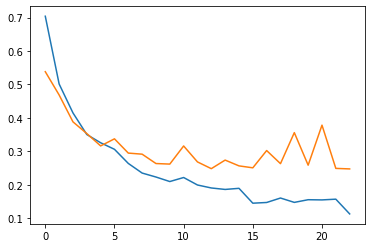

In [6]:
# visualizing losses and accuracy
# print(history.history)
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']
xc         = range(23)

plt.figure()
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
print(xc,val_loss)

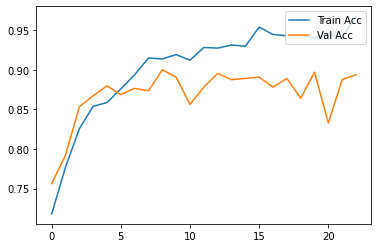

In [7]:
plt.figure()
plt.plot(xc, train_acc,label = 'Train Acc')
plt.plot(xc, val_acc,label = 'Val Acc')
plt.legend(loc='upper right')

In [8]:
_, acc = model.evaluate(test_dataset)
print('Trained with All Three')
print('All: ' ,acc *100)

test_dataset1 = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bilinear/test",
                                          target_size=(32,32),
                                          batch_size =96,
                                          class_mode = 'binary')

_, acc = model.evaluate(test_dataset1)
print('Bilinear: ' ,acc *100)

test_dataset2 = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bicubic/test",
                                          target_size=(32,32),
                                          batch_size =96,
                                          class_mode = 'binary')

_, acc = model.evaluate(test_dataset2)
print('Bicubic: ' ,acc *100)

test_dataset3 = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/pixelsuffle/test",
                                          target_size=(32,32),
                                          batch_size =96,
                                          class_mode = 'binary')

_, acc = model.evaluate(test_dataset3)
print('Pixelsuffle: ' ,acc *100)

9/9 [==============================] - 0s 17ms/step - loss: 0.3162 - accuracy: 0.8675
Trained with All Three
All:  86.75000071525574
Found 400 images belonging to 2 classes.
5/5 [==============================] - 0s 14ms/step - loss: 0.4410 - accuracy: 0.8125
Bilinear:  81.25
Found 400 images belonging to 2 classes.
5/5 [==============================] - 0s 12ms/step - loss: 0.4649 - accuracy: 0.8000
Bicubic:  79.99999523162842
Found 400 images belonging to 2 classes.
5/5 [==============================] - 0s 9ms/step - loss: 0.5002 - accuracy: 0.7775
Pixelsuffle:  77.74999737739563


Prediction

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(32,32))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Real",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Fake",fontsize=30)

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/pixelsuffle/test/imagewoof_test/985.jpg")


In [ ]:

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bicubic/test/SNGAN_bicubic_test/860.jpg")